In [ ]:
!pip install wordcloud

In [2]:
import os

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from pymongo import MongoClient
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /home/vpn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Connecting to database and getting texts

In [3]:
# Creating a connection to MongoDB
client = MongoClient("192.168.30.114", 27017)
db = client["news"]
collection = db["elespectador"]

In [10]:
text = []
for news in list(collection.find({}, {"title": 1, "summary": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["summary"])
    text.append(news["full_text"])

#[x for x in text if x != 'None']

In [ ]:
# using naive method 
# to remove None values in list
res = []
for val in text:
    if val != None :
        res.append(val)
        

In [ ]:
text = res
text = " ".join(text)
text

### Lowercasing

In [ ]:
text = text.lower() # WARNING

### Tokenization

In [ ]:
sentences = sent_tokenize(text)

print(sentences)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
words =  tokenizer.tokenize(text)

print(words)

### Words distribution

In [ ]:
frec_dist = FreqDist(words)

print(frec_dist)

In [ ]:
frec_dist.most_common(5)

In [ ]:
n = 10
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

In [ ]:
wordcloud = WordCloud(max_font_size = 50, max_words = 50, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Stopwords

Stop words are basically a set of commonly used words in any language, not just English.

The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

In [ ]:
stop_words = set(stopwords.words("spanish"))
print(stop_words)

In [ ]:
filtered_words = []
for w in words:
    if w not in stop_words:
        filtered_words.append(w)

print("All words:", words)
print("\n")
print("Substracting stopwords:", filtered_words)

In [ ]:
frec_dist = FreqDist(filtered_words)

print(frec_dist)

frec_dist.most_common(5)

In [ ]:
n = 10
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

In [ ]:
wordcloud = WordCloud(max_font_size = 50, max_words = 30, background_color = "white").generate(" ".join(filtered_words))

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Por Categoria

In [113]:
economia = []
for news in list(collection.find({'category': 'politica'}, {"title": 1, "summary": 1, "full_text": 1, "_id": 0})):
    economia.append(news["title"])
    economia.append(news["summary"])
    economia.append(news["full_text"])

In [114]:
#economia

In [115]:
res = []
for val in economia:
    if val != None :
        res.append(val)

In [116]:
economia = res
economia = " ".join(economia)
#economia

In [117]:
economia = economia.lower() # WARNING

In [118]:
sentences = sent_tokenize(economia)

#print(sentences)

In [119]:
tokenizer = RegexpTokenizer(r'\w+')
words =  tokenizer.tokenize(economia)

#print(words)

In [120]:
frec_dist = FreqDist(words)

print(frec_dist)

<FreqDist with 1286 samples and 3982 outcomes>


In [121]:
frec_dist.most_common(5)

[('de', 291), ('la', 203), ('en', 126), ('que', 123), ('el', 121)]

<BarContainer object of 10 artists>

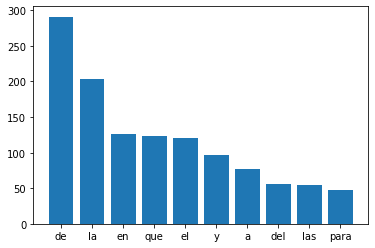

In [122]:
n = 10
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

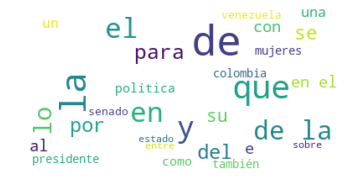

In [123]:
wordcloud = WordCloud(max_font_size = 50, max_words = 30, background_color = "white").generate(economia)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [124]:
stop_words = set(stopwords.words("spanish"))
#print(stop_words)

In [125]:
filtered_words = []
for w in words:
    if w not in stop_words:
        filtered_words.append(w)

#print("All words:", words)
#print("\n")
print("Substracting stopwords:", filtered_words)

Substracting stopwords: ['gobierno', 'rendir', 'cuentas', 'atención', 'mujeres', 'víctimas', 'conflicto', 'congreso', 'citó', 'nueve', 'entidades', 'colombiano', 'ejecutivo', 'expliquen', 'hecho', 'prevenir', 'atender', 'población', '2001', '2009', 'cada', 'hora', '6', 'mujeres', 'sufrieron', 'violencia', 'sexual', 'colombia', 'próximo', 'miércoles', '27', 'octubre', 'previsto', 'congreso', 'república', 'desarrollo', 'audiencia', 'pública', 'gobierno', 'iván', 'duque', 'así', 'entidades', 'rindan', 'cuentas', 'medidas', 'adoptado', 'prevenir', 'atender', 'mujeres', 'víctimas', 'conflicto', 'armado', 'así', 'garantías', 'repetición', 'audiencia', 'realizada', 'comisión', 'séptima', 'senado', 'encargada', 'asuntos', 'mujer', 'familia', 'citadas', 'nueve', 'instituciones', 'deberán', 'dar', 'cuenta', 'instrumentos', 'marcos', 'jurídicos', 'espacios', 'escucha', 'permitan', 'prevenir', 'enfrentar', 'magnitud', 'problemática', 'realidad', 'violencia', 'mujeres', 'quizá', 'conflictos', 'soci

In [126]:
frec_dist = FreqDist(filtered_words)

print(frec_dist)

frec_dist.most_common(5)

<FreqDist with 1179 samples and 2095 outcomes>


[('senado', 19),
 ('colombia', 14),
 ('presidente', 14),
 ('mujeres', 13),
 ('relaciones', 13)]

<BarContainer object of 5 artists>

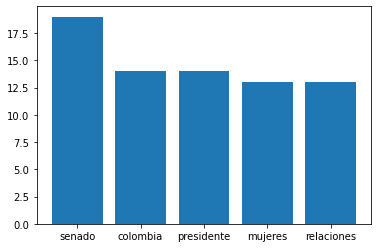

In [127]:
n = 5
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

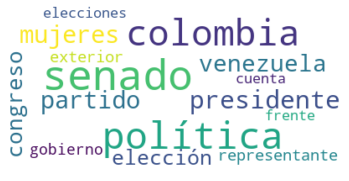

In [128]:
wordcloud = WordCloud(max_font_size = 50, max_words = 15, background_color = "white").generate(" ".join(filtered_words))

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Por término de búsqueda.

In [29]:
search = []
for news in list(collection.find({'$text': {'$search': 'alejandro gaviria'}}, {'_id': 0, 'summary': 1, 'title': 1, 'full_text': 1,})):
    search.append(news["title"])
    search.append(news["summary"])
    search.append(news["full_text"])

In [30]:
#search

In [31]:
res = []
for val in search:
    if val != None :
        res.append(val)

In [32]:
search = res
search = " ".join(search)
#search

In [33]:
search = search.lower() # WARNING

In [34]:
sentences = sent_tokenize(search)

#print(sentences)

In [35]:
tokenizer = RegexpTokenizer(r'\w+')
words =  tokenizer.tokenize(search)

#print(words)

In [36]:
frec_dist = FreqDist(words)

#print(frec_dist)

In [37]:
frec_dist.most_common(5)

[('de', 272), ('la', 154), ('el', 147), ('en', 99), ('que', 98)]

<BarContainer object of 10 artists>

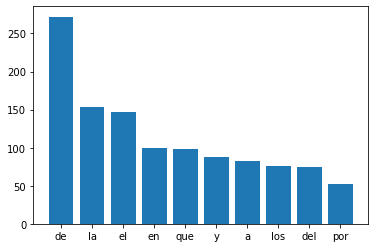

In [38]:
n = 10
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

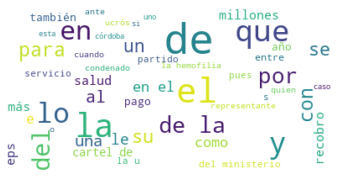

In [39]:
wordcloud = WordCloud(max_font_size = 50, max_words = 50, background_color = "white").generate(search)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [40]:
stop_words = set(stopwords.words("spanish"))
#print(stop_words)

In [41]:
filtered_words = []
for w in words:
    if w not in stop_words:
        filtered_words.append(w)

#print("All words:", words)
#print("\n")
print("Substracting stopwords:", filtered_words)

Substracting stopwords: ['nacional', 'finalista', 'copa', 'colombia', 'equipo', 'verdolaga', 'venció', '1', '0', 'deportivo', 'cali', 'medirá', 'final', 'deportivo', 'pereira', 'atlético', 'nacional', 'dio', 'golpe', 'clasificó', 'final', 'copa', 'colombia', 'equipo', 'antioqueño', 'impuso', '1', '0', 'deportivo', 'cali', 'estadio', 'atanasio', 'girardot', 'equipo', 'dirigido', 'alejandro', 'restrepo', 'aprovechó', 'empate', '2', '2', 'sacó', 'partido', 'ida', 'cali', 'solitario', 'gol', 'jefferson', 'duque', 'instaló', 'final', 'torneo', 'instancia', 'enfrentará', 'deportivo', 'pereira', 'vea', 'deportes', 'espectador', 'partido', 'cerrado', 'muchas', 'opciones', 'primera', 'parte', 'segunda', 'ambas', 'escuadras', 'buscarlo', '56', 'minutos', 'tras', 'remate', 'venenoso', 'dorlan', 'pabón', 'estrelló', 'palo', 'duque', 'buen', '9', 'mandó', 'pelota', 'fondo', 'red', 'podido', 'arbitraje', 'deja', 'tristeza', 'preocupación', 'perjudicando', 'institución', 'fútbol', 'colombiano', 'quej

In [42]:
frec_dist = FreqDist(filtered_words)

print(frec_dist)

frec_dist.most_common(5)

<FreqDist with 1258 samples and 2039 outcomes>


[('salud', 14),
 ('millones', 14),
 ('eps', 14),
 ('representante', 13),
 ('cartel', 13)]

<BarContainer object of 5 artists>

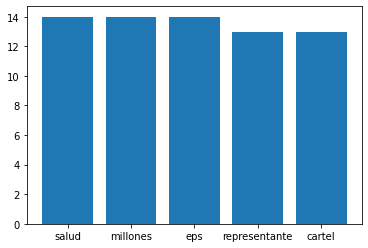

In [43]:
n = 5
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

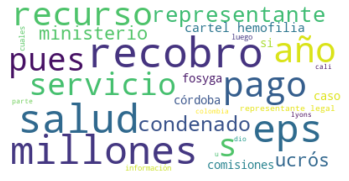

In [44]:
wordcloud = WordCloud(max_font_size = 50, max_words = 30, background_color = "white").generate(" ".join(filtered_words))

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Por Fecha

In [45]:
from_date = '21/10/21 01:00:00'
from_obj = datetime.strptime(from_date, '%d/%m/%y %H:%M:%S')
to_date = '21/10/21 23:59:00'
to_obj = datetime.strptime(to_date, '%d/%m/%y %H:%M:%S')
date = []
for news in list(collection.find({"datetime": {"$gte": from_obj, "$lt": to_obj}}, {'_id': 0, 'summary': 1, 'title': 1, 'full_text': 1,})):
    date.append(news["title"])
    date.append(news["summary"])
    date.append(news["full_text"])

In [46]:
#date

In [47]:
res = []
for val in date:
    if val != None :
        res.append(val)

In [48]:
date = res
date = " ".join(date)
#date

In [49]:
date = date.lower() # WARNING

In [50]:
sentences = sent_tokenize(date)

#print(sentences)

In [51]:
tokenizer = RegexpTokenizer(r'\w+')
words =  tokenizer.tokenize(date)

#print(words)

In [52]:
frec_dist = FreqDist(words)

#print(frec_dist)

In [53]:
frec_dist.most_common(5)

[('de', 421), ('la', 207), ('el', 183), ('en', 149), ('y', 136)]

<BarContainer object of 10 artists>

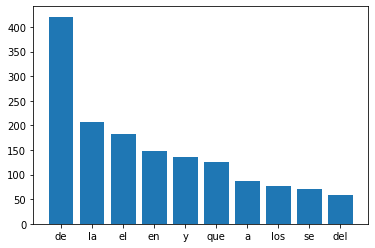

In [54]:
n = 10
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

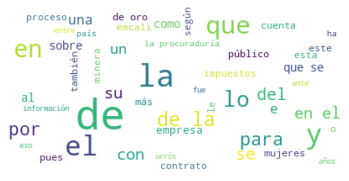

In [55]:
wordcloud = WordCloud(max_font_size = 50, max_words = 50, background_color = "white").generate(date)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [56]:
stop_words = set(stopwords.words("spanish"))
print(stop_words)

{'hemos', 'hayas', 'habéis', 'sí', 'otras', 'sentidas', 'tuvo', 'vosotros', 'estuviste', 'están', 'hay', 'estuvo', 'al', 'sea', 'suyos', 'durante', 'él', 'hubieron', 'estada', 'le', 'hayan', 'hayamos', 'yo', 'mí', 'mía', 'tenías', 'con', 'tuyo', 'hubiéramos', 'seríamos', 'me', 'estadas', 'estuvieses', 'estad', 'ti', 'suya', 'fuisteis', 'fuiste', 'estuvieran', 'estos', 'otra', 'he', 'erais', 'donde', 'fuera', 'esto', 'habríais', 'como', 'habidas', 'seré', 'míos', 'habrán', 'ya', 'tenga', 'seamos', 'estaban', 'muchos', 'estuvimos', 'vuestros', 'está', 'hubiese', 'contra', 'fueseis', 'tendrían', 'tengamos', 'sintiendo', 'quien', 'hubisteis', 'estabas', 'tuviste', 'estarán', 'fuimos', 'serán', 'cual', 'estaremos', 'ese', 'te', 'hubieran', 'tienes', 'o', 'tenéis', 'somos', 'esté', 'tuvieron', 'tuyas', 'hubiésemos', 'sean', 'suyo', 'vuestras', 'habrás', 'teníais', 'tenidos', 'fui', 'hubierais', 'algo', 'en', 'suyas', 'estando', 'las', 'fueron', 'tuvieses', 'estemos', 'tendremos', 'tenido', '

In [57]:
filtered_words = []
for w in words:
    if w not in stop_words:
        filtered_words.append(w)

#print("All words:", words)
#print("\n")
print("Substracting stopwords:", filtered_words)

Substracting stopwords: ['director', 'dian', 'reportó', 'sociedad', 'sistema', 'función', 'pública', 'goebertus', 'debate', 'control', 'político', 'propósito', 'investigación', 'periodística', 'pandora', 'papers', 'representante', 'juanita', 'goebertus', 'aseguró', 'exigir', 'renuncia', 'lisandro', 'junco', 'riveira', 'demanda', 'ética', 'política', 'jurídica', 'desarrollo', 'debate', 'control', 'político', 'congreso', 'república', 'cuenta', 'investigación', 'periodística', 'pandora', 'papers', 'reveló', 'secretos', 'financieros', 'políticos', 'empresarios', 'jurisdicciones', 'beneficios', 'fiscales', 'liderada', 'nivel', 'mundial', 'consorcio', 'internacional', 'periodistas', 'investigación', 'icij', 'colombia', 'espectador', 'connectas', 'representante', 'juanita', 'goebertus', 'aseguró', 'director', 'dian', 'lisandro', 'junco', 'riveira', 'reportó', 'función', 'pública', 'sociedad', 'creó', 'delaware', 'unidos', 'visite', 'aquí', 'especial', 'investigación', 'periodística', 'represe

In [58]:
frec_dist = FreqDist(filtered_words)

print(frec_dist)

frec_dist.most_common(5)

<FreqDist with 1493 samples and 2747 outcomes>


[('1', 14), ('saab', 14), ('colombia', 12), ('pues', 12), ('mujeres', 12)]

<BarContainer object of 5 artists>

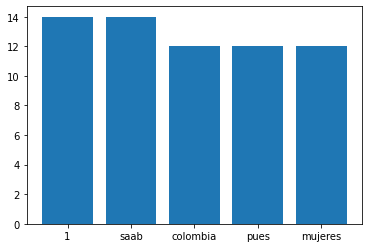

In [61]:
n = 5
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

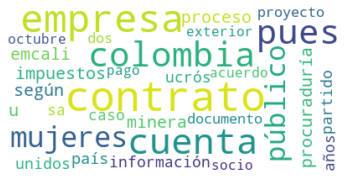

In [60]:
wordcloud = WordCloud(max_font_size = 50, max_words = 30, background_color = "white").generate(" ".join(filtered_words))

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Part of Speech

https://nlp.stanford.edu/software/

In [ ]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"

In [ ]:
java_path = "/usr/bin/java"
os.environ["JAVAHOME"] = java_path

In [ ]:
pos_tagger = StanfordPOSTagger(model, jar, encoding = "utf8")
pos_tagger.tag(words)